# Parse a csv file captured using Sniffer

#### Where is this code located

In [1]:
pwd

'/Users/aloswain/Downloads/Cisco/cisco_hackathon_2018'

#### Import Libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

Comment out these line if you don't have plotly

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go

In [5]:
import pandas as pd
import numpy as np

#### Load the data

In [6]:
#df = pd.read_csv('hackathon', index_col=0)
#df = pd.read_csv('capture_with_rssi_channel', index_col=0, error_bad_lines=False, warn_bad_lines=False, skipfooter=1)
df = pd.read_csv('packet_capture_more_info.csv', index_col=0)

#### Display some of the data

In [7]:
#print(df.head())
df[:11]

,Sequence number,Time,Source address,Sequence number.1,Source address.1,Transmitter address,Source,Data rate,Length,Destination,...,Source address.3,Destination address,Protocol,Transmitter address.1,Signal [dBm],Channel,Channel.1,Has CRC error,Data rate.1,Info
No.,,,,,,,,,,,,,,,,,,,,,
1,NaN,22:57:46.775263,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f",NaN,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f","a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f",4c:77:6d:03:d4:2f,6.0,469,Broadcast,...,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f","00:0a:cd:29:c0:0b,ff:ff:ff:ff:ff:ff",802.11,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f",-72.0,36.0,36.0,No,6.0,"Beacon frame, SN=2232, FN=0, Flags=........., ..."
2,NaN,22:57:46.775275,4c:77:6d:03:d4:2f,NaN,4c:77:6d:03:d4:2f,4c:77:6d:03:d4:2f,4c:77:6d:03:d4:2f,6.0,393,Broadcast,...,4c:77:6d:03:d4:2f,ff:ff:ff:ff:ff:ff,802.11,4c:77:6d:03:d4:2f,-72.0,36.0,36.0,No,6.0,"Beacon frame, SN=2232, FN=0, Flags=........., ..."
3,NaN,22:57:46.781771,a0:ec:f9:6d:1e:27,NaN,a0:ec:f9:6d:1e:27,"a0:ec:f9:6d:1e:27,fc:5b:39:c6:7c:bf",192.168.10.5,24.0,170,192.168.10.50,...,a0:ec:f9:6d:1e:27,00:0a:cd:29:c0:0b,802.11,"a0:ec:f9:6d:1e:27,fc:5b:39:c6:7c:bf",-76.0,36.0,36.0,No,24.0,"802.11 Block Ack, Flags=........."
4,NaN,22:57:46.781781,"a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad",NaN,"a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad","a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad",Apple_8f:10:ad,24.0,168,Cisco_c6:7c:bf,...,"a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad","00:0a:cd:29:c0:0b,fc:5b:39:c6:7c:bf",802.11,"a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad",-75.0,36.0,36.0,No,24.0,"QoS Null function (No data), SN=3021, FN=0, Fl..."
5,NaN,22:57:46.781786,NaN,NaN,NaN,fc:5b:39:c6:7c:bf,192.168.10.5,24.0,94,192.168.10.50,...,NaN,NaN,802.11,fc:5b:39:c6:7c:bf,-76.0,36.0,36.0,No,24.0,"802.11 Block Ack, Flags=........."
6,NaN,22:57:46.781810,78:4f:43:8f:10:ad,NaN,78:4f:43:8f:10:ad,78:4f:43:8f:10:ad,Apple_8f:10:ad,24.0,92,Cisco_c6:7c:bf,...,78:4f:43:8f:10:ad,fc:5b:39:c6:7c:bf,802.11,78:4f:43:8f:10:ad,-75.0,36.0,36.0,No,24.0,"QoS Null function (No data), SN=3021, FN=0, Fl..."
7,NaN,22:57:46.783908,"a0:ec:f9:6d:1e:27,00:f2:8b:26:f4:6f",NaN,"a0:ec:f9:6d:1e:27,00:f2:8b:26:f4:6f","a0:ec:f9:6d:1e:27,00:f2:8b:26:f4:6f",Cisco_26:f4:6f,6.0,446,Broadcast,...,"a0:ec:f9:6d:1e:27,00:f2:8b:26:f4:6f","00:0a:cd:29:c0:0b,ff:ff:ff:ff:ff:ff",802.11,"a0:ec:f9:6d:1e:27,00:f2:8b:26:f4:6f",-75.0,36.0,36.0,No,6.0,"Beacon frame, SN=1741, FN=0, Flags=........., ..."
8,NaN,22:57:46.783916,00:f2:8b:26:f4:6f,NaN,00:f2:8b:26:f4:6f,00:f2:8b:26:f4:6f,Cisco_26:f4:6f,6.0,370,Broadcast,...,00:f2:8b:26:f4:6f,ff:ff:ff:ff:ff:ff,802.11,00:f2:8b:26:f4:6f,-75.0,36.0,36.0,No,6.0,"Beacon frame, SN=1741, FN=0, Flags=........., ..."
9,NaN,22:57:46.785385,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2d",NaN,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2d","a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2d",4c:77:6d:03:d4:2d,6.0,446,Broadcast,...,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2d","00:0a:cd:29:c0:0b,ff:ff:ff:ff:ff:ff",802.11,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2d",-72.0,36.0,36.0,No,6.0,"Beacon frame, SN=2233, FN=0, Flags=........., ..."


#### What are the columns

In [8]:
print(df.columns)

Index(['Sequence number', 'Time', 'Source address', 'Sequence number.1',
       'Source address.1', 'Transmitter address', 'Source', 'Data rate',
       'Length', 'Destination', 'TID', 'TID.1', 'PWR MGT',
       'Partial Virtual Bitmap', 'Receiver address', 'Source address.2',
       'Source address.3', 'Destination address', 'Protocol',
       'Transmitter address.1', 'Signal [dBm]', 'Channel', 'Channel.1',
       'Has CRC error', 'Data rate.1', 'Info'],
      dtype='object')


#### Convert the time column to pandas datetime format

In [9]:
df['Time'] = (pd.to_datetime(df['Time'],infer_datetime_format=True))
df.head()
#x.head()

,Sequence number,Time,Source address,Sequence number.1,Source address.1,Transmitter address,Source,Data rate,Length,Destination,...,Source address.3,Destination address,Protocol,Transmitter address.1,Signal [dBm],Channel,Channel.1,Has CRC error,Data rate.1,Info
No.,,,,,,,,,,,,,,,,,,,,,
1,NaN,2018-03-09 22:57:46.775263,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f",NaN,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f","a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f",4c:77:6d:03:d4:2f,6.0,469,Broadcast,...,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f","00:0a:cd:29:c0:0b,ff:ff:ff:ff:ff:ff",802.11,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f",-72.0,36.0,36.0,No,6.0,"Beacon frame, SN=2232, FN=0, Flags=........., ..."
2,NaN,2018-03-09 22:57:46.775275,4c:77:6d:03:d4:2f,NaN,4c:77:6d:03:d4:2f,4c:77:6d:03:d4:2f,4c:77:6d:03:d4:2f,6.0,393,Broadcast,...,4c:77:6d:03:d4:2f,ff:ff:ff:ff:ff:ff,802.11,4c:77:6d:03:d4:2f,-72.0,36.0,36.0,No,6.0,"Beacon frame, SN=2232, FN=0, Flags=........., ..."
3,NaN,2018-03-09 22:57:46.781771,a0:ec:f9:6d:1e:27,NaN,a0:ec:f9:6d:1e:27,"a0:ec:f9:6d:1e:27,fc:5b:39:c6:7c:bf",192.168.10.5,24.0,170,192.168.10.50,...,a0:ec:f9:6d:1e:27,00:0a:cd:29:c0:0b,802.11,"a0:ec:f9:6d:1e:27,fc:5b:39:c6:7c:bf",-76.0,36.0,36.0,No,24.0,"802.11 Block Ack, Flags=........."
4,NaN,2018-03-09 22:57:46.781781,"a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad",NaN,"a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad","a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad",Apple_8f:10:ad,24.0,168,Cisco_c6:7c:bf,...,"a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad","00:0a:cd:29:c0:0b,fc:5b:39:c6:7c:bf",802.11,"a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad",-75.0,36.0,36.0,No,24.0,"QoS Null function (No data), SN=3021, FN=0, Fl..."
5,NaN,2018-03-09 22:57:46.781786,NaN,NaN,NaN,fc:5b:39:c6:7c:bf,192.168.10.5,24.0,94,192.168.10.50,...,NaN,NaN,802.11,fc:5b:39:c6:7c:bf,-76.0,36.0,36.0,No,24.0,"802.11 Block Ack, Flags=........."


In [10]:
#print(df['Time'].dtype)
x = df['Time']
x.head()

No.
1   2018-03-09 22:57:46.775263
2   2018-03-09 22:57:46.775275
3   2018-03-09 22:57:46.781771
4   2018-03-09 22:57:46.781781
5   2018-03-09 22:57:46.781786
Name: Time, dtype: datetime64[ns]

In [11]:
y = df['Signal [dBm]']
y.head()

No.
1   -72.0
2   -72.0
3   -76.0
4   -75.0
5   -76.0
Name: Signal [dBm], dtype: float64

In [12]:
print((x.dtype))
print((y.dtype))

datetime64[ns]
float64


#### Plot the graph

In [13]:
#df1 = pd.DataFrame ({'x' : x[0:11], 'y':y[0:11]})
#df1.plot()

We display the "Time" on the x-axis and the Signal of tranmitted frames on y-axis

In [14]:
data = [go.Scatter(x=df['Time'][0:500], y = df['Signal [dBm]'][0:500])]

py.iplot(data)

#### Display some analytics

As an example, we group the data by the **Data rate** & **Channel** and display the number of frames in the file

In [15]:
df.groupby(['Data rate', 'Channel']).size()

Data rate  Channel
6.0        36.0       19043
12.0       36.0         511
24.0       36.0        7433
48.0       36.0           4
dtype: int64

#### Set the time to be the index 

In [16]:
df = df.set_index('Time')

In [17]:
df.head()

,Sequence number,Source address,Sequence number.1,Source address.1,Transmitter address,Source,Data rate,Length,Destination,TID,...,Source address.3,Destination address,Protocol,Transmitter address.1,Signal [dBm],Channel,Channel.1,Has CRC error,Data rate.1,Info
Time,,,,,,,,,,,,,,,,,,,,,
2018-03-09 22:57:46.775263,NaN,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f",NaN,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f","a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f",4c:77:6d:03:d4:2f,6.0,469,Broadcast,NaN,...,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f","00:0a:cd:29:c0:0b,ff:ff:ff:ff:ff:ff",802.11,"a0:ec:f9:6d:1e:27,4c:77:6d:03:d4:2f",-72.0,36.0,36.0,No,6.0,"Beacon frame, SN=2232, FN=0, Flags=........., ..."
2018-03-09 22:57:46.775275,NaN,4c:77:6d:03:d4:2f,NaN,4c:77:6d:03:d4:2f,4c:77:6d:03:d4:2f,4c:77:6d:03:d4:2f,6.0,393,Broadcast,NaN,...,4c:77:6d:03:d4:2f,ff:ff:ff:ff:ff:ff,802.11,4c:77:6d:03:d4:2f,-72.0,36.0,36.0,No,6.0,"Beacon frame, SN=2232, FN=0, Flags=........., ..."
2018-03-09 22:57:46.781771,NaN,a0:ec:f9:6d:1e:27,NaN,a0:ec:f9:6d:1e:27,"a0:ec:f9:6d:1e:27,fc:5b:39:c6:7c:bf",192.168.10.5,24.0,170,192.168.10.50,NaN,...,a0:ec:f9:6d:1e:27,00:0a:cd:29:c0:0b,802.11,"a0:ec:f9:6d:1e:27,fc:5b:39:c6:7c:bf",-76.0,36.0,36.0,No,24.0,"802.11 Block Ack, Flags=........."
2018-03-09 22:57:46.781781,NaN,"a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad",NaN,"a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad","a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad",Apple_8f:10:ad,24.0,168,Cisco_c6:7c:bf,6.0,...,"a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad","00:0a:cd:29:c0:0b,fc:5b:39:c6:7c:bf",802.11,"a0:ec:f9:6d:1e:27,78:4f:43:8f:10:ad",-75.0,36.0,36.0,No,24.0,"QoS Null function (No data), SN=3021, FN=0, Fl..."
2018-03-09 22:57:46.781786,NaN,NaN,NaN,NaN,fc:5b:39:c6:7c:bf,192.168.10.5,24.0,94,192.168.10.50,NaN,...,NaN,NaN,802.11,fc:5b:39:c6:7c:bf,-76.0,36.0,36.0,No,24.0,"802.11 Block Ack, Flags=........."


#### Display a distribution plot of the length

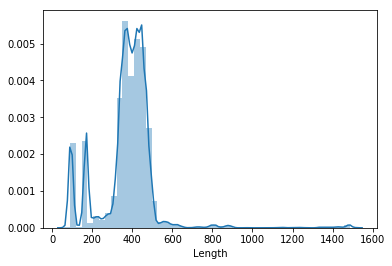

In [18]:
#df.plot()
sns.distplot(df["Length"])